In [50]:
# Setup
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import hvplot.pandas
import gmaps

# Data files
registration_data_combined = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/Registration_Files/Combined_Registrations.csv"
fuel_stations = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/ele_fuel_stations (Aug 7 2023).csv"
EV_Prices = "/Users/flynnlives/Documents/GitHub/UCI_Project_1/Registration_Files/2022_EV_Prices.csv" 

In [30]:
# There is a clear shift in demand slope in EV registrations compared to fossil fuel vehicles

In [31]:
#Read in
registration_data_df = pd.read_csv(registration_data_combined)
registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600


In [32]:
#sum columns
total_registrations = registration_data_df[['Electric (EV)', 
    'Plug-In Hybrid Electric (PHEV)', 
    'Hybrid Electric (HEV)', 
    'Biodiesel', 
    'Ethanol/Flex (E85)', 
    'Compressed Natural Gas (CNG)', 
    'Propane',
    'Hydrogen',
    'Methanol',
    'Gasoline',
    'Diesel',
    'Unknown Fuel']].sum()

total_registrations

Electric (EV)                       13858400
Plug-In Hybrid Electric (PHEV)       7980200
Hybrid Electric (HEV)               66260400
Biodiesel                            9440400
Ethanol/Flex (E85)                 341447800
Compressed Natural Gas (CNG)         6285200
Propane                                28400
Hydrogen                              135200
Methanol                                3800
Gasoline                          3253536600
Diesel                             111616400
Unknown Fuel                        34279600
dtype: int64

In [33]:
#add new columns for EV registration rate
registration_data_df["Total Registrations"] = registration_data_df.sum(axis=1)
registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321


In [34]:
# Add new columns for registration rate
registration_data_df["Total EV Registrations"] = registration_data_df[['Electric (EV)', 
    'Plug-In Hybrid Electric (PHEV)', 
    'Hybrid Electric (HEV)']].sum(axis=1)

registration_data_df["Total Gasoline/Diesel Registrations"] = registration_data_df[['Gasoline', 
    'Diesel']].sum(axis=1)

registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522,63900,4203200
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122,11700,487600
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522,237000,5674800
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422,38200,2319200
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822,2778700,31784300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521,331100,6075600
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721,16500,1314400
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921,110500,4782400
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321,6600,544500


In [35]:
# Add new columns for final rate
registration_data_df["EV Registration Rate %"] = registration_data_df['Total EV Registrations'] / registration_data_df['Total Registrations'] * 100
registration_data_df["Gas/Diesel Registration Rate %"] = registration_data_df['Total Gasoline/Diesel Registrations'] / registration_data_df['Total Registrations'] * 100

registration_data_df

,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Unknown Fuel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,48100,449800,100,100,0,0,4077100,126100,30300,4797522,63900,4203200,1.331938,87.611896
1,2022,Alaska,2000,700,9000,8700,48600,0,0,0,0,457100,30500,5500,564122,11700,487600,2.074019,86.435204
2,2022,Arizona,65800,20400,150800,61200,446000,600,800,0,0,5476100,198700,70100,6492522,237000,5674800,3.650353,87.405172
3,2022,Arkansas,5100,2500,30600,33300,283900,200,0,0,0,2229500,89700,10600,2687422,38200,2319200,1.421437,86.298319
4,2022,California,903600,361100,1514000,183900,1338000,10300,1500,14900,0,31059000,725300,8200,36121822,2778700,31784300,7.692580,87.991962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,59000,359700,600,100,0,0,5792000,283600,64400,6892521,331100,6075600,4.803758,88.147718
360,2021,West Virginia,1000,1000,14500,13900,129800,200,0,0,0,1268300,46100,10900,1487721,16500,1314400,1.109079,88.349899
361,2021,Wisconsin,9300,7700,93500,39800,556500,700,100,0,0,4639100,143300,29900,5521921,110500,4782400,2.001115,86.607541
362,2021,Wyoming,500,400,5700,17100,59400,100,0,0,0,482400,62100,15600,645321,6600,544500,1.022747,84.376613


In [36]:
#truncated headers
reduced_registration_data_df = registration_data_df[[
    "Year",
    "State",	
    "Electric (EV)",	
    "Plug-In Hybrid Electric (PHEV)",
    "Hybrid Electric (HEV)",
    "Gasoline",	
    "Diesel",	
    "Total Registrations",	
    "Total EV Registrations",	
    "Total Gasoline/Diesel Registrations",	
    "EV Registration Rate %",	
    "Gas/Diesel Registration Rate %"]]

reduced_registration_data_df


,Year,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
0,2022,Alabama,8700,4400,50800,4077100,126100,4797522,63900,4203200,1.331938,87.611896
1,2022,Alaska,2000,700,9000,457100,30500,564122,11700,487600,2.074019,86.435204
2,2022,Arizona,65800,20400,150800,5476100,198700,6492522,237000,5674800,3.650353,87.405172
3,2022,Arkansas,5100,2500,30600,2229500,89700,2687422,38200,2319200,1.421437,86.298319
4,2022,California,903600,361100,1514000,31059000,725300,36121822,2778700,31784300,7.692580,87.991962
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021,Washington,66800,24300,240000,5792000,283600,6892521,331100,6075600,4.803758,88.147718
360,2021,West Virginia,1000,1000,14500,1268300,46100,1487721,16500,1314400,1.109079,88.349899
361,2021,Wisconsin,9300,7700,93500,4639100,143300,5521921,110500,4782400,2.001115,86.607541
362,2021,Wyoming,500,400,5700,482400,62100,645321,6600,544500,1.022747,84.376613


In [37]:
#EVs bar plot showing the total number of rows using pyplot.
ev_sum = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).sum()
ev_mean = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).mean()
ev_median = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).median()
ev_var = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).var()
ev_std = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).std()
ev_sem = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["Year"]).sem()


ev_stat_summary = pd.DataFrame({
                             "Sum of EV Registration" : ev_sum,
                             "Mean of EV Registrations" : ev_mean,
                             "Median of EV Registrations" : ev_median,
                             "Var of EV Registrations" : ev_var,
                             "Std.Dev of EV Registrations" : ev_std,
                             "Std. Error of EV Registrations" : ev_sem})

ev_stat_summary


,Sum of EV Registration,Mean of EV Registrations,Median of EV Registrations,Var of EV Registrations,Std.Dev of EV Registrations,Std. Error of EV Registrations
Year,,,,,,
2016,8551800,164457.692308,39100.0,3.671862e+11,6.059589e+05,84031.376625
2017,9515400,182988.461538,43750.0,4.558029e+11,6.751317e+05,93623.927786
2018,10552600,202934.615385,48950.0,5.624535e+11,7.499690e+05,104001.992377
2019,11666200,224350.000000,54900.0,6.882237e+11,8.295925e+05,115043.778588
2020,12854000,247192.307692,61450.0,8.348949e+11,9.137258e+05,126710.974365
2021,15466000,297423.076923,75900.0,1.202657e+12,1.096657e+06,152078.962621
2022,19493000,374865.384615,100200.0,1.907456e+12,1.381107e+06,191525.032190


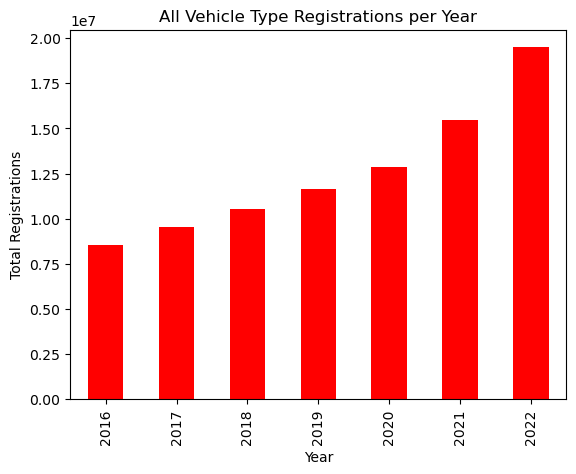

In [38]:

bar_chart = ev_sum.plot.bar(color='r')
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.title("All Vehicle Type Registrations per Year")
plt.show()

In [39]:
#Gas/Diesel bar plot showing the total number of rows using pyplot.
gas_sum = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).sum()
gas_mean = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).mean()
gas_median = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).median()
gas_var = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).var()
gas_std = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).std()
gas_sem = reduced_registration_data_df["Total Gasoline/Diesel Registrations"].groupby(reduced_registration_data_df["Year"]).sem()


gas_stat_summary = pd.DataFrame({
                             "Sum of Gas/Diesel Registration" : gas_sum,
                             "Mean of Gas/Diesel Registrations" : gas_mean,
                             "Median of Gas/Diesel Registrations" : gas_median,
                             "Var of Gas/Diesel Registrations" : gas_var,
                             "Std.Dev Gas/Diesel EV Registrations" : gas_std,
                             "Std. Gas/Diesel of EV Registrations" : gas_sem})

gas_stat_summary


,Sum of Gas/Diesel Registration,Mean of Gas/Diesel Registrations,Median of Gas/Diesel Registrations,Var of Gas/Diesel Registrations,Std.Dev Gas/Diesel EV Registrations,Std. Gas/Diesel of EV Registrations
Year,,,,,,
2016,465178200,8.945735e+06,3424750.0,1.024185e+15,3.200289e+07,4.438003e+06
2017,471063000,9.058904e+06,3426750.0,1.050697e+15,3.241445e+07,4.495075e+06
2018,474707800,9.128996e+06,3423850.0,1.067356e+15,3.267041e+07,4.530571e+06
2019,479819400,9.227296e+06,3427050.0,1.091099e+15,3.303178e+07,4.580684e+06
2020,481705400,9.263565e+06,3365950.0,1.100255e+15,3.317009e+07,4.599863e+06
2021,495619600,9.531146e+06,3558650.0,1.164640e+15,3.412682e+07,4.732539e+06
2022,497059600,9.558838e+06,3585100.0,1.172183e+15,3.423715e+07,4.747839e+06


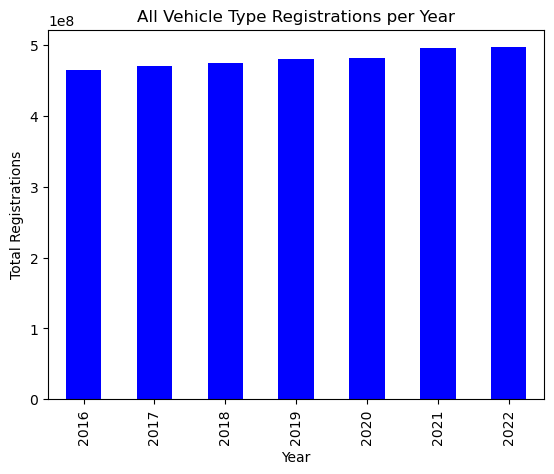

In [40]:
bar_chart = gas_sum.plot.bar(color='b')
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.title("All Vehicle Type Registrations per Year")
plt.show()

In [41]:
ev_sum.head()

Year
2016     8551800
2017     9515400
2018    10552600
2019    11666200
2020    12854000
Name: Total EV Registrations, dtype: int64

In [42]:
# EV sum diff YoY
ev_sum_diff = np.diff(np.array(ev_sum))
ev_sum_diff_perc = ev_sum_diff / np.array(ev_sum)[:-1] * 100
ev_sum_diff_perc


array([11.26780327, 10.9002249 , 10.55284953, 10.18155012, 20.32052279,
       26.03776025])

In [43]:
gas_sum.head()

Year
2016    465178200
2017    471063000
2018    474707800
2019    479819400
2020    481705400
Name: Total Gasoline/Diesel Registrations, dtype: int64

In [44]:
# Fossil fuel sum diff YoY
gas_sum_diff = np.diff(np.array(gas_sum))
gas_sum_diff_perc = gas_sum_diff / np.array(gas_sum)[:-1] * 100
gas_sum_diff_perc

array([1.26506358, 0.77373939, 1.07678871, 0.39306456, 2.88852896,
       0.29054541])

In [55]:
ev_sum_regis_break = reduced_registration_data_df.groupby('Year').sum()
ev_sum_regis_break

,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %
Year,,,,,,,,,,
2016,560600,508000,7483200,449710200,15468000,525559432,8551800,465178200,72.394871,4571.595337
2017,754200,689200,8072000,454831400,16231600,536811884,9515400,471063000,78.677410,4531.776774
2018,1145200,922600,8484800,458148200,16559600,544517136,10552600,474707800,85.224569,4502.447149
2019,1567200,1073200,9025800,462717600,17101800,553022788,11666200,479819400,92.625616,4481.394039
2020,2037800,1188800,9627400,463984400,17721000,556703440,12854000,481705400,101.999597,4468.469454
2021,2908800,1573600,10983600,481399000,14220600,561869492,15466000,495619600,122.906139,4558.898790
2022,4884600,2024800,12583600,482745800,14313800,567123144,19493000,497059600,153.238716,4533.273076


In [56]:
ev_sum_regis_break['Electric (EV)']

Year
2016     560600
2017     754200
2018    1145200
2019    1567200
2020    2037800
2021    2908800
2022    4884600
Name: Electric (EV), dtype: int64

In [59]:
ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)']

Year
2016     508000
2017     689200
2018     922600
2019    1073200
2020    1188800
2021    1573600
2022    2024800
Name: Plug-In Hybrid Electric (PHEV), dtype: int64

In [60]:
ev_sum_regis_break['Hybrid Electric (HEV)']

Year
2016     7483200
2017     8072000
2018     8484800
2019     9025800
2020     9627400
2021    10983600
2022    12583600
Name: Hybrid Electric (HEV), dtype: int64

In [61]:
np.diff(np.array(ev_sum_regis_break['Electric (EV)']))/np.array(ev_sum_regis_break['Electric (EV)'])[:-1] * 100

array([34.5344274 , 51.84301246, 36.84945861, 30.02807555, 42.74217293,
       67.92491749])

In [62]:
np.diff(np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)']))/np.array(ev_sum_regis_break['Plug-In Hybrid Electric (PHEV)'])[:-1] * 100

array([35.66929134, 33.86535113, 16.32343377, 10.77152441, 32.36877524,
       28.67310625])

In [63]:
np.diff(np.array(ev_sum_regis_break['Hybrid Electric (HEV)']))/np.array(ev_sum_regis_break['Hybrid Electric (HEV)'])[:-1] * 100

array([ 7.86829164,  5.11397423,  6.37610786,  6.66533714, 14.08687704,
       14.56717288])

In [65]:
# Year, ranges list
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
avg_range = [145, 151, 189, 209, 210, 217, 276]
max_range = [315, 335, 335, 370, 402, 520, 520]

In [66]:
year_range_df = pd.DataFrame({
                             "Year" : year,
                             "Average Range" : avg_range,
                             "Maximum Range" : max_range,
                            })
year_range_df

,Year,Average Range,Maximum Range
0,2016,145,315
1,2017,151,335
2,2018,189,335
3,2019,209,370
4,2020,210,402
5,2021,217,520
6,2022,276,520


In [67]:
year_range_df.set_index("Year")

,Average Range,Maximum Range
Year,,
2016,145,315
2017,151,335
2018,189,335
2019,209,370
2020,210,402
2021,217,520
2022,276,520


In [68]:
ev_sum_regis_merged = ev_sum_regis_break.merge(year_range_df, on='Year')
ev_sum_regis_merged

,Year,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Gasoline,Diesel,Total Registrations,Total EV Registrations,Total Gasoline/Diesel Registrations,EV Registration Rate %,Gas/Diesel Registration Rate %,Average Range,Maximum Range
0,2016,560600,508000,7483200,449710200,15468000,525559432,8551800,465178200,72.394871,4571.595337,145,315
1,2017,754200,689200,8072000,454831400,16231600,536811884,9515400,471063000,78.677410,4531.776774,151,335
2,2018,1145200,922600,8484800,458148200,16559600,544517136,10552600,474707800,85.224569,4502.447149,189,335
3,2019,1567200,1073200,9025800,462717600,17101800,553022788,11666200,479819400,92.625616,4481.394039,209,370
4,2020,2037800,1188800,9627400,463984400,17721000,556703440,12854000,481705400,101.999597,4468.469454,210,402
5,2021,2908800,1573600,10983600,481399000,14220600,561869492,15466000,495619600,122.906139,4558.898790,217,520
6,2022,4884600,2024800,12583600,482745800,14313800,567123144,19493000,497059600,153.238716,4533.273076,276,520


In [45]:
# Add in YoY growth %
# line plot for comparison between vehicle types


In [ ]:
# Add pyplot

In [ ]:
# Add pyplot

In [ ]:
# Add pyplot

In [46]:
#  2016 - 2022 Narrowing down to highest registration count of EVs
ev_sum_state = reduced_registration_data_df["Total EV Registrations"].groupby(reduced_registration_data_df["State"]).sum()
ev_sum_state

State
Alabama                   290800
Alaska                     52700
Arizona                  1048000
Arkansas                  178700
California              12871000
Colorado                  916000
Connecticut               457700
Delaware                  123100
District of Columbia      127700
Florida                  2341900
Georgia                  1012500
Hawaii                    275900
Idaho                     194500
Illinois                 1561000
Indiana                   595600
Iowa                      281300
Kansas                    268500
Kentucky                  317700
Louisiana                 177800
Maine                     185600
Maryland                  960700
Massachusetts            1081700
Michigan                  803400
Minnesota                 664700
Mississippi               120000
Missouri                  679700
Montana                    94800
Nebraska                  158300
Nevada                    403300
New Hampshire             198800
New 

In [52]:
ev_price_df = pd.read_csv(EV_Prices).dropna(how='all')
ev_price_df

,Brand,Model,MSRP,Dest Chrg,Tax Credit (kWh),After Tax,Range,Type
0,Lucid,"Air Dream Edition Range 19"" (2022)","169,000","1,500","7,500","163,000",520,EV
1,Lucid,"Air Grand Touring 19"" (2022)","139,000","1,500","7,500","133,000",516,EV
2,Lucid,"Air Dream Edition Range 21"" (2022)","169,000","1,500","7,500","163,000",481,EV
3,Lucid,"Air Dream Edition Performance 19"" (202.2)","169,000","1,500","7,500","163,000",471,EV
4,Lucid,"Air Grand Touring 21"" (2022)","139,000","1,500","7,500","133,000",469,EV
...,...,...,...,...,...,...,...,...
145,Volvo,2022 Volvo XC60 T8 Twin Engine,"53,500","1,095","5,419","49,176",NaN,PHEV
146,Volvo,2022 Volvo XC90 T8 Twin Engine,"63,450","1,095","5,419","59,126",NaN,PHEV
147,Volvo,2022 Volvo V60 T8 Twin Engine Polestar,"67,550","1,095","5,419","63,226",NaN,PHEV
148,Volvo,2022 Volvo XC60 T8 Twin Engine,"53,500","1,095","5,419","49,176",NaN,PHEV


In [47]:
## dictionary of state abbr to state for referencing etc.
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [48]:
location_df  = pd.read_csv(fuel_stations)

location_df = location_df.loc[location_df['State'].dropna().index] ### drop missing entries only in State column
drop_state = [i for i in location_df['State'].unique() if i not in states.keys()] ### get list of states to drop using state dictionary
for st in drop_state:
    location_df.drop(location_df[location_df['State'] == st].index,inplace = True)

lats = location_df.groupby('State').mean()['Latitude']
long = location_df.groupby('State').mean()['Longitude']
count = location_df.groupby('State').count()['Fuel Type Code']

map_df = pd.DataFrame([count,long,lats]).T ## T transposes dataframe, switches columns and index values
map_df = map_df.rename({'Fuel Type Code':'Count'},axis = 1)
map_df = map_df.reset_index()

colors = 'State'
size = 'Count'
xlab = 'x'
ylab = 'y'
fh = 500
fw = 700
map_df.hvplot.points(x='Longitude',y='Latitude',geo = True,xlabel=xlab,ylabel = ylab,c= colors,s = size,frame_height = fh,frame_width=fw,alpha = 0.75,tiles='StamenTonerBackground',scale = 0.5)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (State,Count)

In [ ]:
# Add map 

In [ ]:
# on buying behavior 